In [3]:
import scipy.io

# Load the .mat file
Dir = '/media/alingold/MenonLab/20231010_timelapse'
mat = scipy.io.loadmat(Dir + '/calMetafile.mat')
#mat = scipy.io.loadmat(Dir + '/supMetafile.mat')

# Print the keys, which are the variable names in MATLAB
print("Keys: ", mat.keys())

# Print the values of each key
for key in mat.keys():
    if key not in ['__header__', '__version__', '__globals__']:  # these are not data keys
        print("'{}':\n{}".format(key, mat[key]))

Surface = mat['Surface']  
print(Surface[:, 1:30])

Keys:  dict_keys(['__header__', '__version__', '__globals__', 'AmCrop', 'AmExp', 'AmGain', 'CalRepeat', 'CalWait', 'LEDPower', 'OrcaCrop', 'Xinit', 'Yinit', 'Zinit', 'binning', 'orcaExp', 'path', 'startTime', 'xCount', 'xStep', 'yCount', 'yStep', 'zCount', 'zStep'])
'AmCrop':
[[3300 1200 1200 1200]]
'AmExp':
[[3000]]
'AmGain':
[[200]]
'CalRepeat':
[[10000]]
'CalWait':
[[60000]]
'LEDPower':
[[0.5]]
'OrcaCrop':
[[1100  900  700  700]]
'Xinit':
[[6.6]]
'Yinit':
[[3.1759]]
'Zinit':
[[11.91]]
'binning':
[[1]]
'orcaExp':
[[3]]
'path':
['C:\\Cannula Microscope\\test']
'startTime':
['10-Oct-2023 11:52:32']
'xCount':
[[4]]
'xStep':
[[0.05]]
'yCount':
[[1]]
'yStep':
[[0]]
'zCount':
[[30]]
'zStep':
[[0.005]]


KeyError: 'Surface'

In [ ]:
# Display images with Mouse Position
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

for n in range(0, 5):
    # Load the .mat file
#    File = f'/{n}_0.mat'
    #File = f'/3_0_{n}.mat'
    File = f'/x0_y0_z{n}_t80.mat'
#    File = f'/x0_y0_z0.mat'
    mat = scipy.io.loadmat(Dir + File)
    # Access the variables in the .mat file
    objCCM = mat['objCCM']
    objRef = mat['objRef']
    
    def on_move(event):
        if event.inaxes is not None:
            x, y = event.xdata, event.ydata
            event.inaxes.set_title(f'x={x:.2f}, y={y:.2f}', fontsize=8)
            event.inaxes.figure.canvas.draw()
    
    # Display a ccm and ref image from an open .mat file
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{n}.mat - objCCM')  # Add title here
    ax1.imshow(objCCM, cmap='gray')
    fig1.canvas.mpl_connect('motion_notify_event', on_move)
    
    fig2, ax2 = plt.subplots()
    ax2.set_title(f'{n}.mat - objRef')  # Add title here
    ax2.imshow(objRef, cmap='gray')
    fig2.canvas.mpl_connect('motion_notify_event', on_move)
    
    
    plt.show()
    print('ccm_size' + str(np.shape(objCCM)))
    print('ref_size' + str(np.shape(objRef)))

ModuleNotFoundError: No module named 'ipympl'

In [6]:
Len = 25
y = np.zeros_like(objRef, dtype=np.float64)  # ensure y is also of type double
for X in range(25):
    print(f"Progress: {X}")
    for Y in range(25):
        File = f"/x{X}_y{Y}_z0.mat"
        data = loadmat(Dir + File)
        y += np.array(data['objRef'], dtype=np.float64)  # ensure data is of type double
        
y = 100 * (y - y.min()) / (y.max() - y.min())

fig, ax = plt.subplots()
ax.imshow(y, cmap='gray')


Progress: 0


NameError: name 'loadmat' is not defined

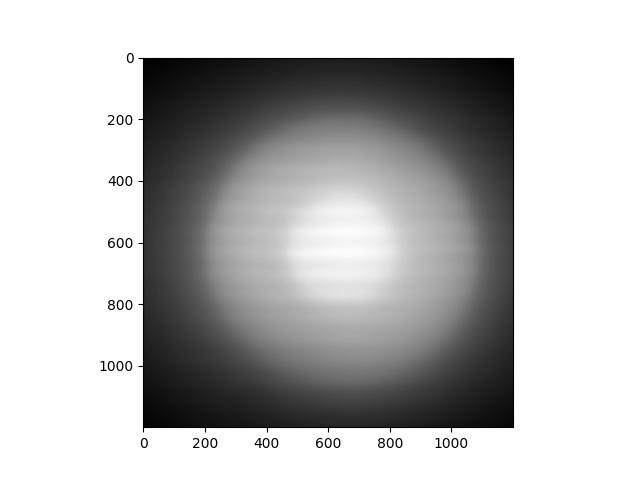

In [5]:
# Create summation dot for frame averaging dataset
Len = 900
y = np.zeros_like(objRef, dtype=np.float64)
for X in range(10, Len+1, 2):
    # print(f"Progress: {X}")
    File = f"/{X}.mat"
    data = loadmat(Dir + File)
    y += np.array(data['objRef'], dtype=np.float64)

y = y * 256 / np.max(y)
# x_ave = np.sum(y, axis=0)
# y_ave = np.sum(y, axis=1)

fig, ax = plt.subplots()
ax.imshow(y, cmap='gray')

Square x1: 458.66706892590184, X2: 835.9020105517703, y1: 425.99835016078816, y2: 803.2332917866567


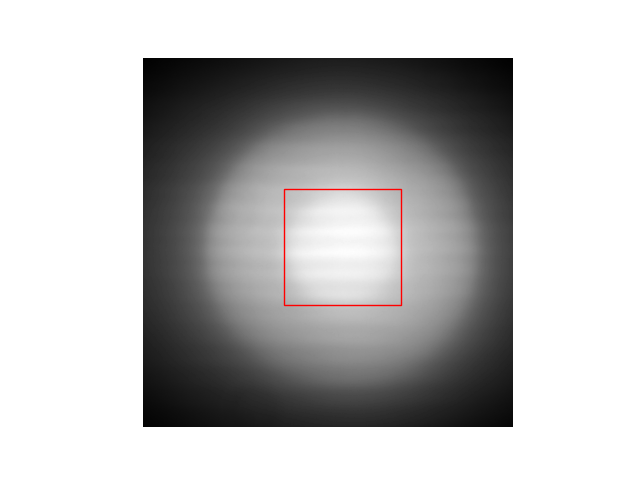

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def smallest_square(img):
    total_brightness = np.sum(img)
    target_brightness = 0.13 * total_brightness

    # sort pixels by brightness
    flat = np.sort(img.ravel())[::-1]
    cum_brightness = np.cumsum(flat)

    # find the index of smallest brightness that is greater than target_brightness
    index = np.searchsorted(cum_brightness, target_brightness, side='right')

    # find coordinates of those pixels in the original image
    indices = np.atleast_1d(np.argsort(img, axis=None)[::-1][:index])
    coords = np.unravel_index(indices, img.shape)

    # calculate the centroid of the selected pixels
    centroid_y, centroid_x = np.mean(coords, axis=1)

    # calculate distances from the centroid to all selected pixels
    distances = np.sqrt((coords[0]-centroid_y)**2 + (coords[1]-centroid_x)**2)

    # find the maximum distance
    max_distance = np.max(distances)

    # define the square such that the centroid is in the middle and the furthest point is on the border
    x_min, x_max = centroid_x - max_distance, centroid_x + max_distance
    y_min, y_max = centroid_y - max_distance, centroid_y + max_distance

    # make sure coordinates are inside the image
    x_min = max(0, x_min)
    y_min = max(0, y_min)
    x_max = min(img.shape[1], x_max)
    y_max = min(img.shape[0], y_max)

    # return square coordinates and size
    return x_min, y_min, x_max - x_min, y_max - y_min

# assuming y is your image
x, y_coord, w, h = smallest_square(y)

# print the coordinates and size for debugging
print(f"Square x1: {x}, X2: {x+w}, y1: {y_coord}, y2: {y_coord+h}")

# plot the result
fig, ax = plt.subplots()
ax.imshow(y, cmap='gray')
rect = Rectangle((x, y_coord), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# set limits to ensure rectangle is in the visible plot
ax.set_xlim(0, y.shape[1])
ax.set_ylim(y.shape[0], 0)  # inverted due to the way images are displayed
ax.axis('off')
plt.show()
